In [1]:
if(!require(devtools)){
    install.packages("devtools", dependencies = T)
    library(devtools)
}
#install.packages("rlang")
#install.packages("tidyverse", dependencies = TRUE)
library(ggplot2)
if(!require(ggthemes)){
    install.packages("ggthemes", dependencies = T)
    library(ggthemes)
}
## plota o grid dos boxplots
if(!require(cowplot)){
    install.packages("cowplot", dependencies = T)
    library(cowplot)
}
#if(!require(ggplot2)){
#    install.packages("ggplot2", dependencies = T)
#    library(ggplot2)
#}

## Dados CV AFS 
CV_24h = c(0.0258, 0.0304, 0.0240, 0.0201, 0.0203, 0.0207)
CV_120h = c(0.0730, 0.0815, 0.0569, 0.0803, 0.0544, 0.0560)

dat <- data.frame(cond = factor(rep(c("CV AFS 24h","CV AFS 120h"), each=6)), 
                  rating = c(CV_24h,CV_120h))

p <- ggplot(dat, aes(x=cond, y=rating, color=cond)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab(expression(paste("[CH"["3"], 'Hg]'))) +
    xlab('Method')

#p + theme_stata() + scale_color_stata()

Loading required package: devtools
Loading required package: usethis
Loading required package: ggthemes
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map



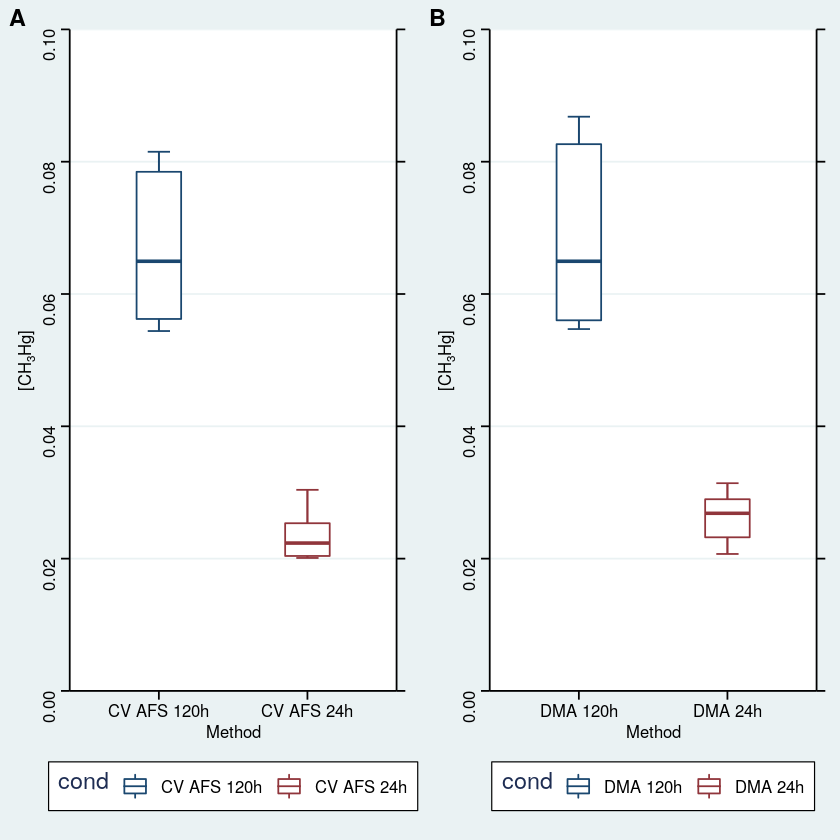

In [2]:
## Dados DMA queima direta
DMA_24h = c(0.0260, 0.0314, 0.0294, 0.0277, 0.0223, 0.0207)
DMA_120h = c(0.0708, 0.0868, 0.0591, 0.0866, 0.0550, 0.0547)

dat <- data.frame(cond = factor(rep(c("DMA 24h","DMA 120h"), each=6)), 
                  rating = c(DMA_24h,DMA_120h))

p2 <- ggplot(dat, aes(x=cond, y=rating, color=cond)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab(expression(paste("[CH"["3"], 'Hg]'))) + 
    xlab('Method')

#p2 + theme_stata() + scale_color_stata()

plot_grid(p + theme_stata() + scale_color_stata(), 
          p2 + theme_stata() + scale_color_stata(), labels = "AUTO")


# Teste de normalidade

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


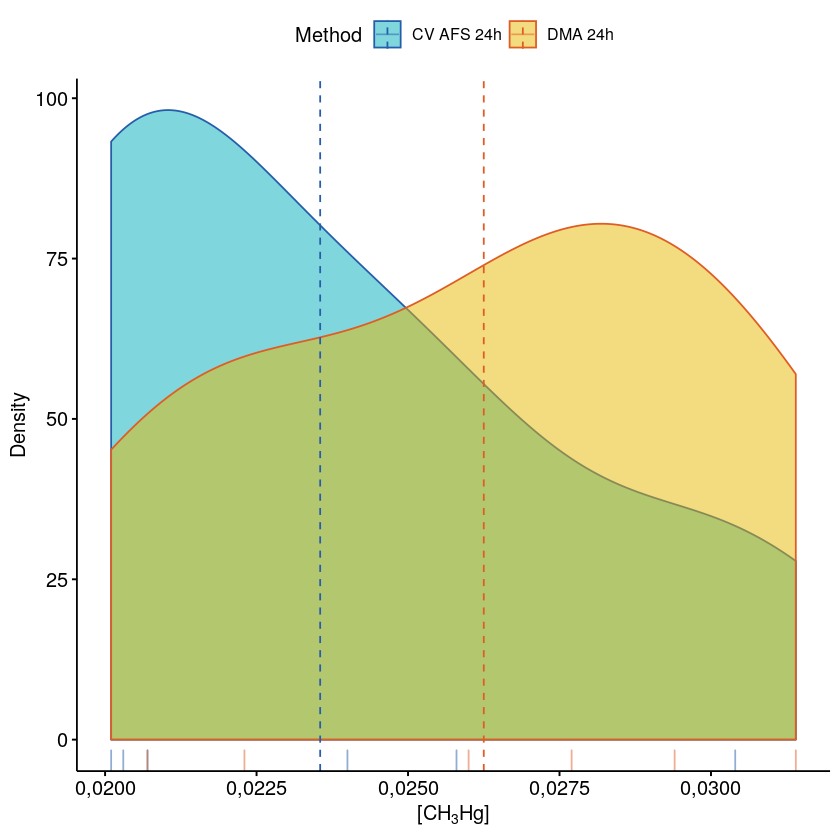

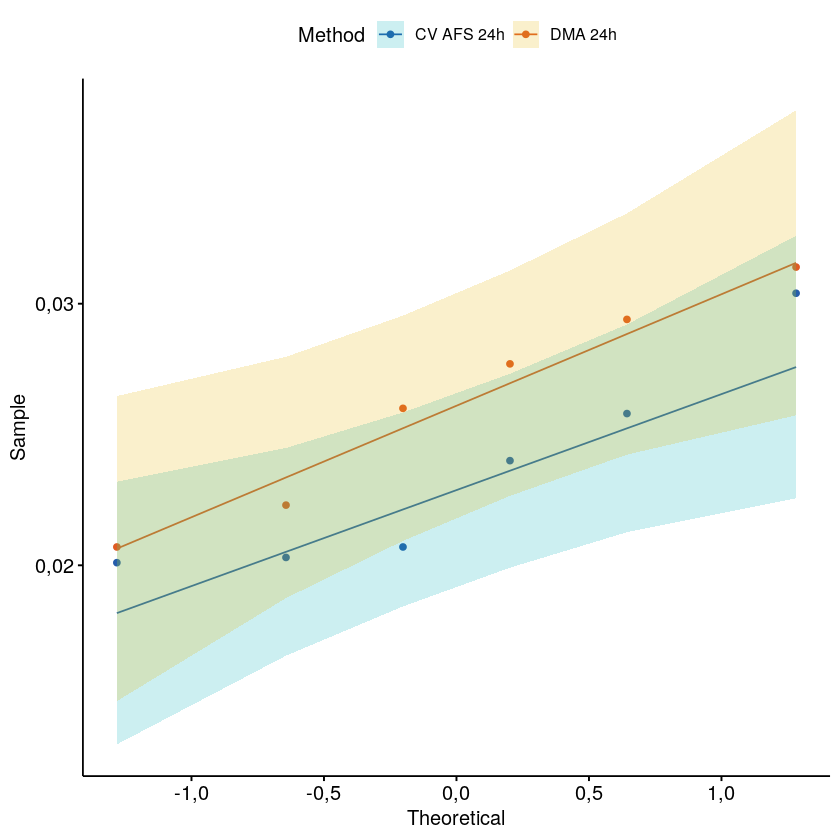

In [3]:
## The ggpubr R package facilitates the creation of beautiful ggplot2-based graphs 
## for researcher with non-advanced programming backgrounds.
if(!require(ggpubr)){
    install.packages("ggpubr", dependencies = T)
    library(ggpubr)
}

dat <- data.frame(Method = factor(rep(c("CV AFS 24h","DMA 24h"), each=6)), 
                  rating = c(CV_24h, DMA_24h))

p = ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "Method",
          fill = "Method",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = expression(paste("[CH"["3"], 'Hg]')),
          ylab = "Density") +
    scale_colour_few("Dark")
p

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "Method", 
         fill = "Method",
         palette = c("#00AFBB", "#E7B800")) +
    scale_colour_few("Dark")

## realiza o shapiro test for 24h techniques

Dado que o valor p > 0.05, então a amostra não difere da normalidade

In [4]:
ans = shapiro.test(dat[grep("CV AFS 24h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para CV 24h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA 24h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA 24h: ", ans$p.value);

[1] "O valor p foi para CV 24h:  0,204024411831543"

[1] "O valor p foi para DMA 24h:  0,801250709623691"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


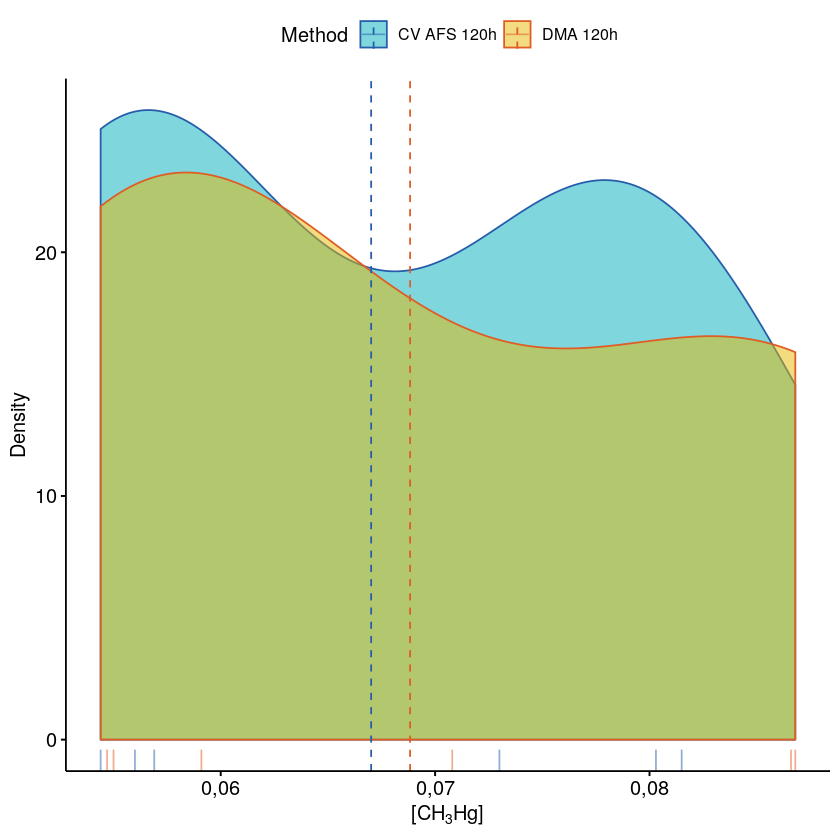

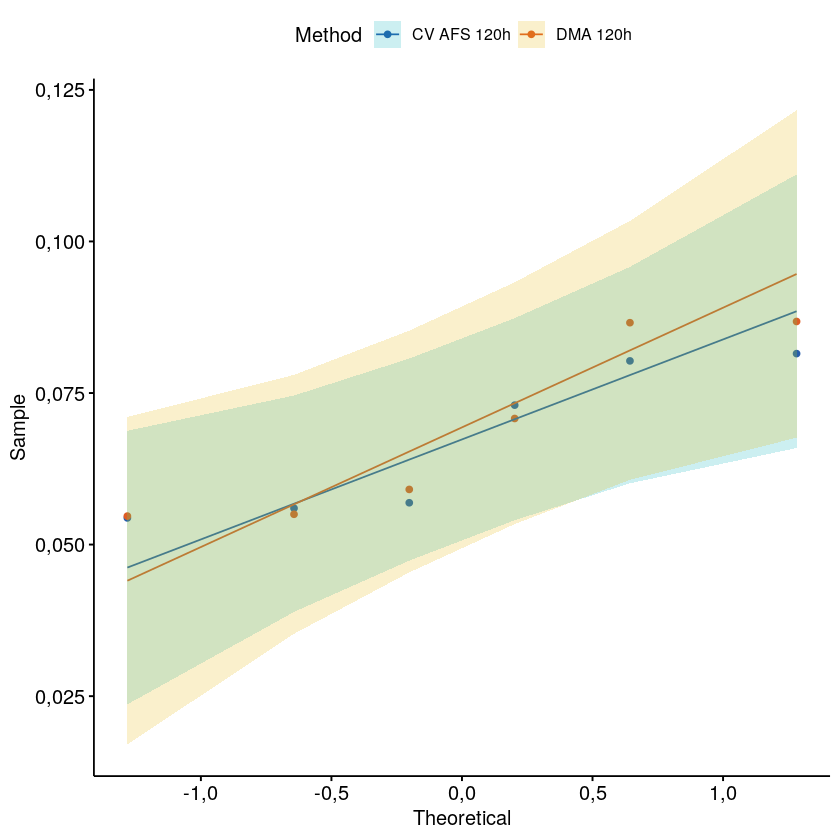

In [5]:
## The ggpubr R package facilitates the creation of beautiful ggplot2-based graphs 
## for researcher with non-advanced programming backgrounds.
if(!require(ggpubr)){
    install.packages("ggpubr", dependencies = T)
    library(ggpubr)
}

dat <- data.frame(Method = factor(rep(c("CV AFS 120h","DMA 120h"), each=6)), 
                  rating = c(CV_120h, DMA_120h))

p = ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "Method",
          fill = "Method",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = expression(paste("[CH"["3"], 'Hg]')),
          ylab = "Density") +
    scale_colour_few("Dark")
p

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "Method", 
         fill = "Method",
         palette = c("#00AFBB", "#E7B800")) +
    scale_colour_few("Dark")

## realiza o shapiro test for 120h techniques

Dado que o valor p > 0.05, então a amostra não difere da normalidade

In [6]:
ans = shapiro.test(dat[grep("CV AFS 120h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para CV 24h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA 120h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA 24h: ", ans$p.value);

[1] "O valor p foi para CV 24h:  0,0855690612234013"

[1] "O valor p foi para DMA 24h:  0,101080692395924"

# Primeiro testo a variancia e t-test para as duas técnicas com 24h e depois com 120h

Dado que p-value > 0.05 para as duas amostras, então concluimos que  
there is no significant difference between the two variances,  
logo não há diferenca estatística entre os resultados

In [7]:
cat("##################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 24h #####################\n")
cat("##################################################################\n")
ans = var.test(DMA_24h, CV_24h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

### Como p-value > 0.05, entao resultado do teste de variancia mostra que
### there is no significant difference between the two variances.

#t.test(c1, c2, alternative = "greater" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#2 questao

#N = c(22, 21, 28, 30, 33, 33, 26, 24, 31, 22)
#A = c(25, 28, 26, 36, 32, 39, 28, 33, 30, 27)

#t.test(N, A, alternative = "less" ,mu = 0, paired = TRUE, var.equal = FALSE, conf.level = 0.95)

#3 questao

#prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#p.test <- prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#z_0 <- sign(0.150-0.178)*sqrt(p.test$statistic[[1]]); z_0

##################################################################
##################### TESTE DE VARIÂNCIA 24h #####################
##################################################################



	F test to compare two variances

data:  DMA_24h and CV_24h
F = 1,0271, num df = 5, denom df = 5, p-value = 0,9773
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0,1437177 7,3397723
sample estimates:
ratio of variances 
          1,027061 


[1] "O valor p foi:  0,977338320234578"

[1] "O valor f foi:  1,02706131078224"

In [8]:
DMA_24h = c(0.0260, 0.0314, 0.0294, 0.0277, 0.0223, 0.0207)
DMA_120h = c(0.0708, 0.0868, 0.0591, 0.0866, 0.0550, 0.0547)
CV_24h = c(0.0258, 0.0304, 0.0240, 0.0201, 0.0203, 0.0207)
CV_120h = c(0.0730, 0.0815, 0.0569, 0.0803, 0.0544, 0.0560)

cat("###################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 120h #####################\n")
cat("###################################################################\n")
ans = var.test(DMA_120h, CV_120h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

#t.test(c1, c2, alternative = "greater" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#2 questao

#N = c(22, 21, 28, 30, 33, 33, 26, 24, 31, 22)
#A = c(25, 28, 26, 36, 32, 39, 28, 33, 30, 27)

#t.test(N, A, alternative = "less" ,mu = 0, paired = TRUE, var.equal = FALSE, conf.level = 0.95)

#3 questao

#prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#p.test <- prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#z_0 <- sign(0.150-0.178)*sqrt(p.test$statistic[[1]]); z_0

###################################################################
##################### TESTE DE VARIÂNCIA 120h #####################
###################################################################



	F test to compare two variances

data:  DMA_120h and CV_120h
F = 1,4016, num df = 5, denom df = 5, p-value = 0,7201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0,1961296 10,0164914
sample estimates:
ratio of variances 
          1,401617 


[1] "O valor p foi:  0,720058134818644"

[1] "O valor f foi:  1,40161716137448"

## Teste t

In [9]:
cat("######################################################\n")
cat("##################### T-TEST 24h #####################\n")
cat("######################################################\n")

t.test(DMA_24h, CV_24h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

######################################################
##################### T-TEST 24h #####################
######################################################



	Welch Two Sample t-test

data:  DMA_24h and CV_24h
t = 1,1417, df = 9,9982, p-value = 0,2802
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,00256957  0,00796957
sample estimates:
mean of x mean of y 
  0,02625   0,02355 


In [10]:
cat("#######################################################\n")
cat("##################### T-TEST 120h #####################\n")
cat("#######################################################\n")

t.test(DMA_120h, CV_120h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#######################################################
##################### T-TEST 120h #####################
#######################################################



	Welch Two Sample t-test

data:  DMA_120h and CV_120h
t = 0,22631, df = 9,728, p-value = 0,8256
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,01613710  0,01977043
sample estimates:
 mean of x  mean of y 
0,06883333 0,06701667 


# Comparando DMA géis eluídos e DMA queima direta

Aplico densidade da amostra e QQplot seguido do shapiro + t.test

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


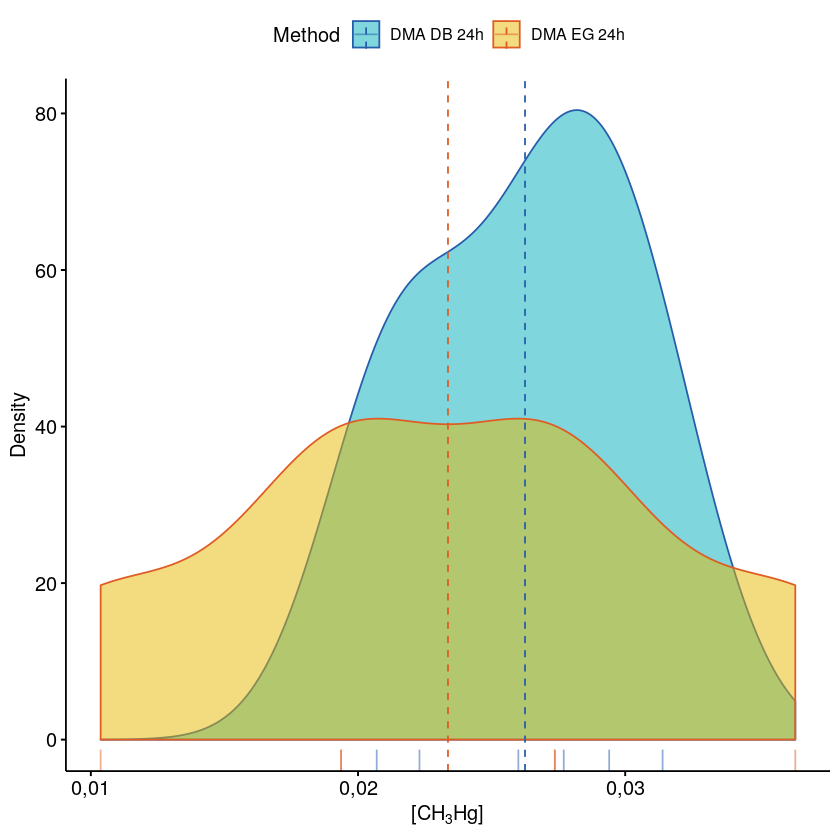

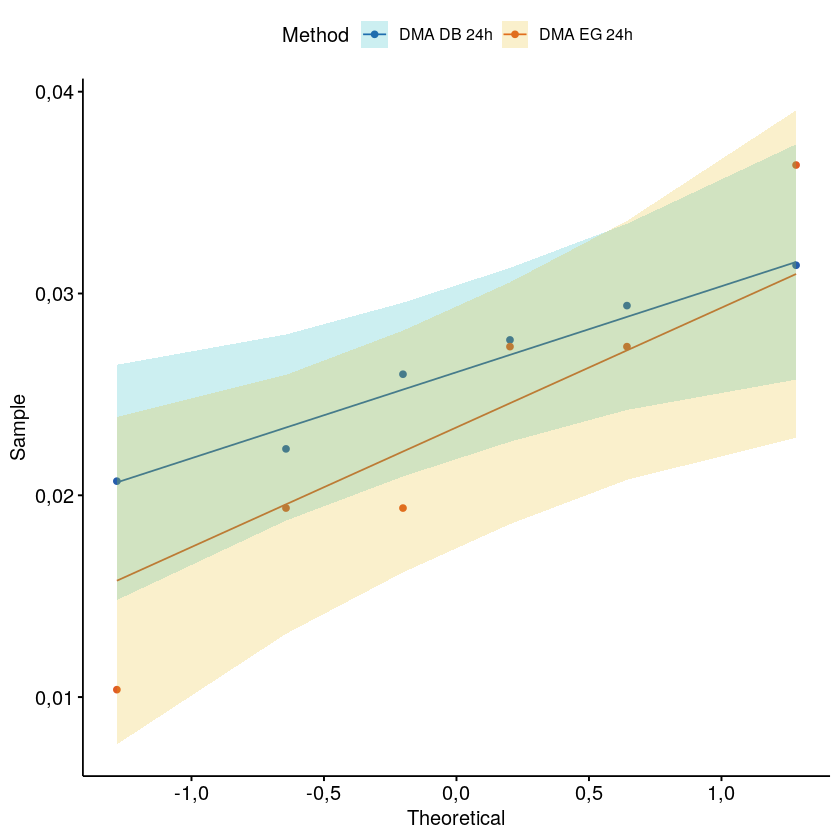

In [11]:
DMA_GE_24h = c(0.027366666666667,0.036366666666667,0.010366666666667,
               0.019366666666667,0.027366666666667,0.019366666666667)
DMA_GE_120h = c(0.079466666666667,0.070466666666667,0.062466666666667,
                0.062466666666667,0.070466666666667,0.053366666666667)

dat <- data.frame(Method = factor(rep(c("DMA DB 24h", "DMA EG 24h"), each=6)), 
                  rating = c(DMA_24h, DMA_GE_24h))

ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "Method",
          fill = "Method",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = expression(paste("[CH"["3"], 'Hg]')),
          ylab = "Density") +
    scale_colour_few("Dark")

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "Method", 
         fill = "Method",
         palette = c("#00AFBB", "#E7B800")) +
    scale_colour_few("Dark")

In [12]:
ans = shapiro.test(dat[grep("DMA DB 24h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA DB 24h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA EG 24h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA EG 24h: ", ans$p.value);

cat("###################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 24h ######################\n")
cat("###################################################################\n")
ans = var.test(DMA_24h, DMA_GE_24h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

cat("#######################################################\n")
cat("##################### T-TEST 24h ######################\n")
cat("#######################################################\n")

t.test(DMA_24h, DMA_GE_24h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

[1] "O valor p foi para DMA DB 24h:  0,801250709623691"

[1] "O valor p foi para DMA EG 24h:  0,837726801929021"

###################################################################
##################### TESTE DE VARIÂNCIA 24h ######################
###################################################################



	F test to compare two variances

data:  DMA_24h and DMA_GE_24h
F = 0,21148, num df = 5, denom df = 5, p-value = 0,1134
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0,02959261 1,51131754
sample estimates:
ratio of variances 
         0,2114801 


[1] "O valor p foi:  0,113356993530989"

[1] "O valor f foi:  0,211480099502488"

#######################################################
##################### T-TEST 24h ######################
#######################################################



	Welch Two Sample t-test

data:  DMA_24h and DMA_GE_24h
t = 0,71562, df = 7,0243, p-value = 0,4973
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,00663736  0,01240403
sample estimates:
 mean of x  mean of y 
0,02625000 0,02336667 


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


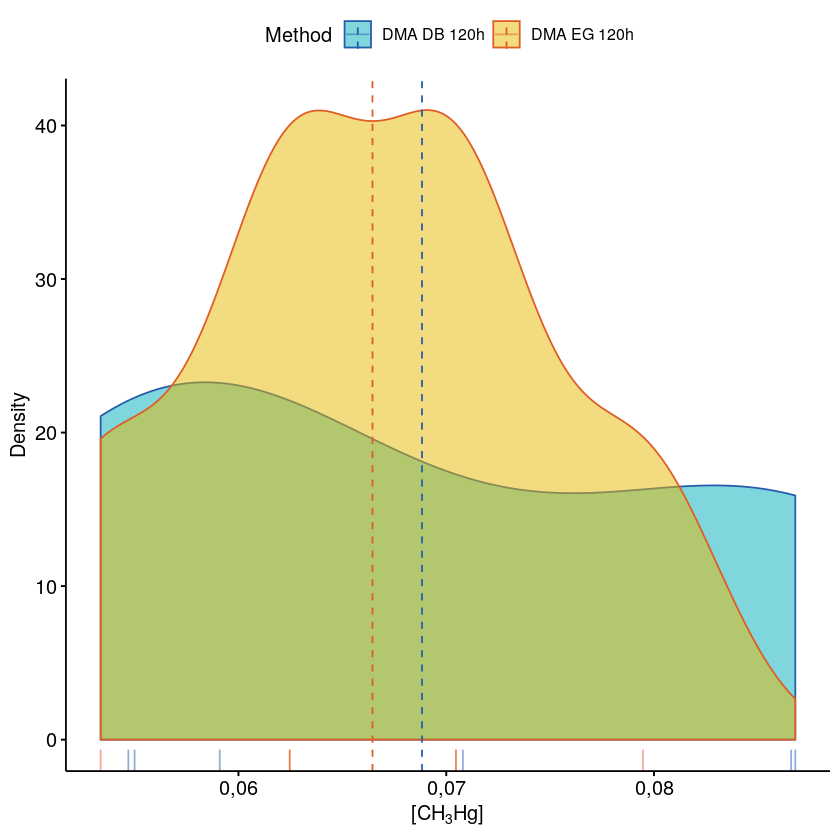

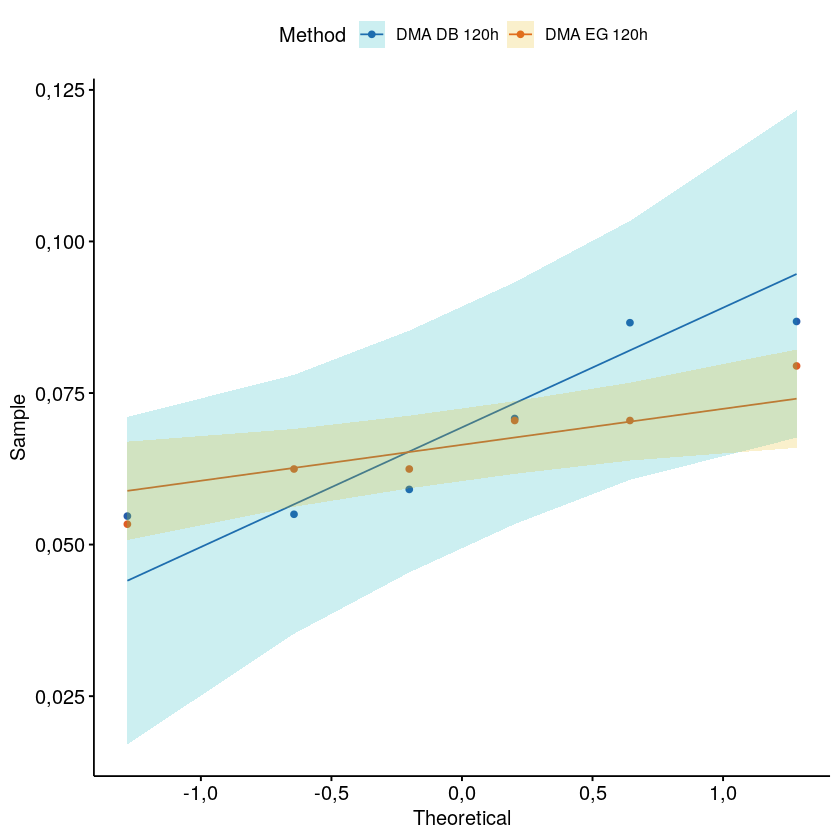

In [13]:
dat <- data.frame(Method = factor(rep(c("DMA DB 120h", "DMA EG 120h"), each=6)), 
                  rating = c(DMA_120h, DMA_GE_120h))

ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "Method",
          fill = "Method",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = expression(paste("[CH"["3"], 'Hg]')),
          ylab = "Density") +
    scale_colour_few("Dark")

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "Method", 
         fill = "Method",
         palette = c("#00AFBB", "#E7B800")) +
    scale_colour_few("Dark")

In [14]:
ans = shapiro.test(dat[grep("DMA DB 120h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA DB 120h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA EG 120h", dat$Method, ignore.case=T),]$rating)

paste("O valor p foi para DMA EG 120h: ", ans$p.value);

cat("###################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 24h ######################\n")
cat("###################################################################\n")
ans = var.test(DMA_120h, DMA_GE_120h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

cat("#######################################################\n")
cat("##################### T-TEST 24h ######################\n")
cat("#######################################################\n")

t.test(DMA_120h, DMA_GE_120h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

[1] "O valor p foi para DMA DB 120h:  0,101080692395924"

[1] "O valor p foi para DMA EG 120h:  0,838160466950582"

###################################################################
##################### TESTE DE VARIÂNCIA 24h ######################
###################################################################



	F test to compare two variances

data:  DMA_120h and DMA_GE_120h
F = 2,7883, num df = 5, denom df = 5, p-value = 0,2848
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0,3901708 19,9263256
sample estimates:
ratio of variances 
           2,78831 


[1] "O valor p foi:  0,28482803743571"

[1] "O valor f foi:  2,78830968220295"

#######################################################
##################### T-TEST 24h ######################
#######################################################



	Welch Two Sample t-test

data:  DMA_120h and DMA_GE_120h
t = 0,33343, df = 8,1777, p-value = 0,7472
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,01403766  0,01880433
sample estimates:
 mean of x  mean of y 
0,06883333 0,06645000 


Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduzidos por coerção”

            Df    Sum Sq   Mean Sq F value Pr(>F)
Method       2 0,0000313 1,564e-05   0,412   0,67
Residuals   15 0,0005698 3,799e-05               

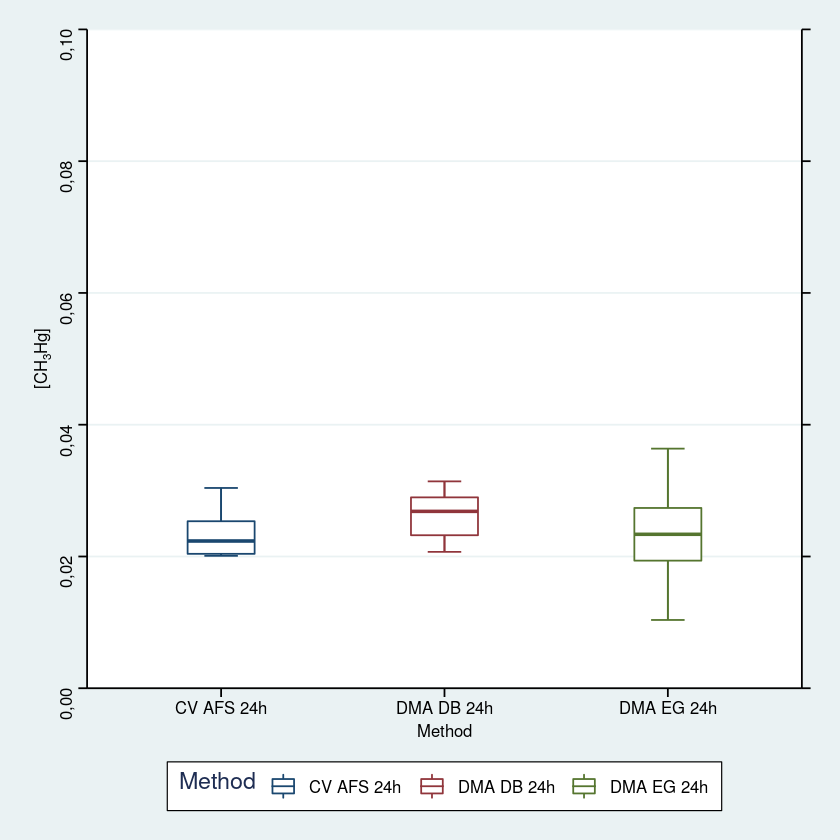

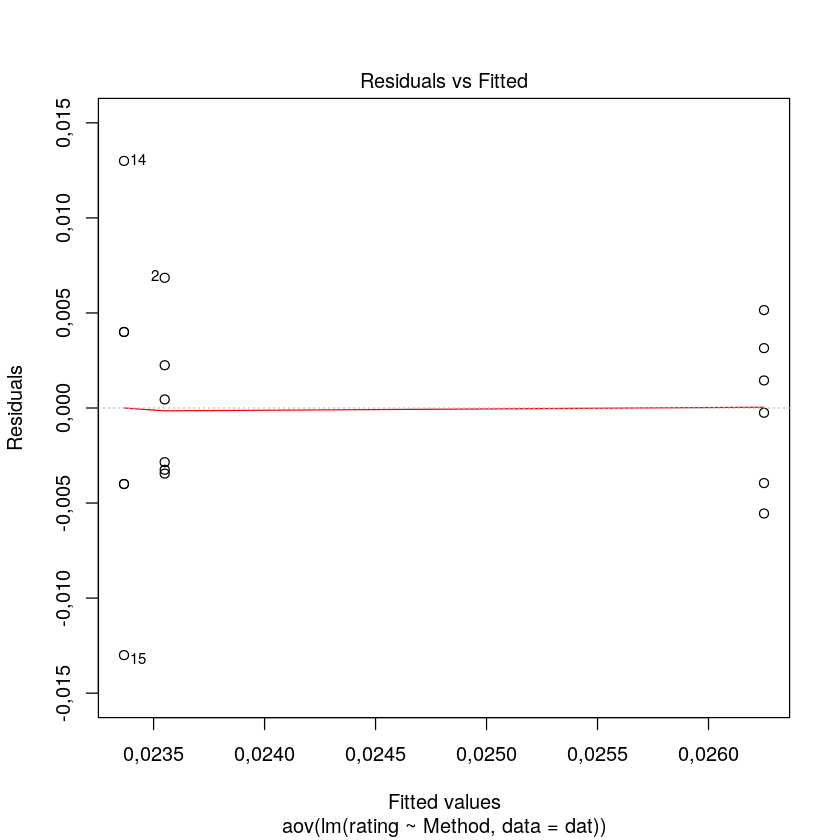


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0,96358, p-value = 0,6719


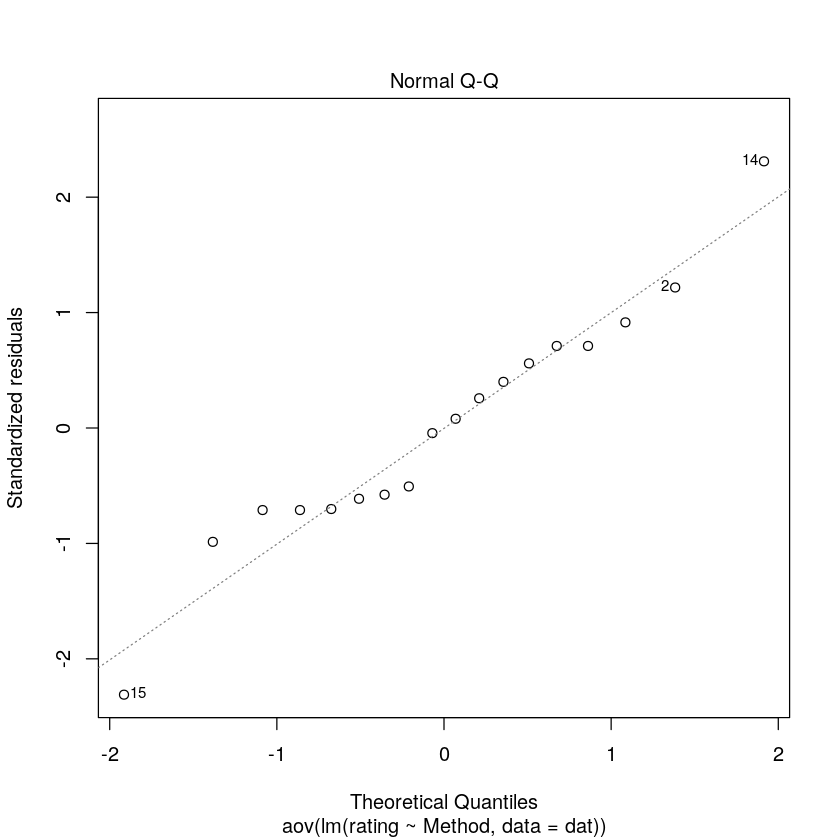

In [15]:
dat <- data.frame(Method = factor(rep(c("CV AFS 24h", "DMA DB 24h", "DMA EG 24h"), each=6)), 
                  rating = c(CV_24h, DMA_24h, DMA_GE_24h))

#dat

res.aov2 <- aov(lm(rating ~ Method, data = dat))
summary(res.aov2)

## resultado = sem diferença significante de "desempenho"

p <- ggplot(dat, aes(x=Method, y=rating, color=Method)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab(expression(paste("[CH"["3"], 'Hg]')))

p + theme_stata() + scale_color_stata()

# 1. Homogeneity of variances
plot(res.aov2, 1)

# 2. Normality
plot(res.aov2, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov2)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

Warning message in printCoefmat(x, digits = digits, signif.stars = signif.stars, :
“NAs introduzidos por coerção”

            Df    Sum Sq   Mean Sq F value Pr(>F)
Method       2 0,0000186 0,0000093    0,06  0,942
Residuals   15 0,0023377 0,0001558               

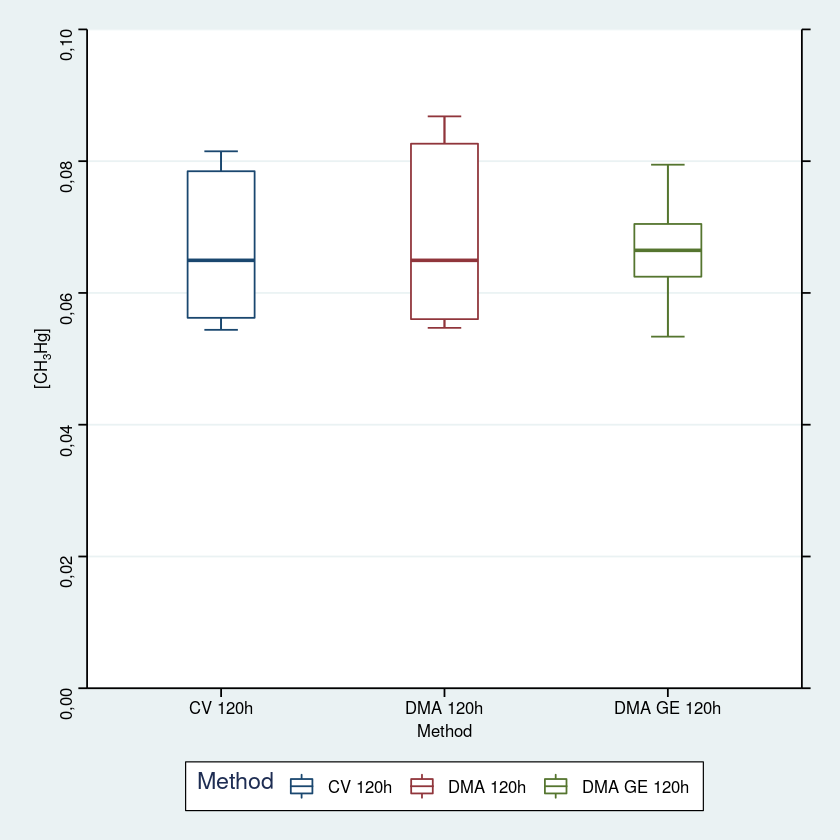

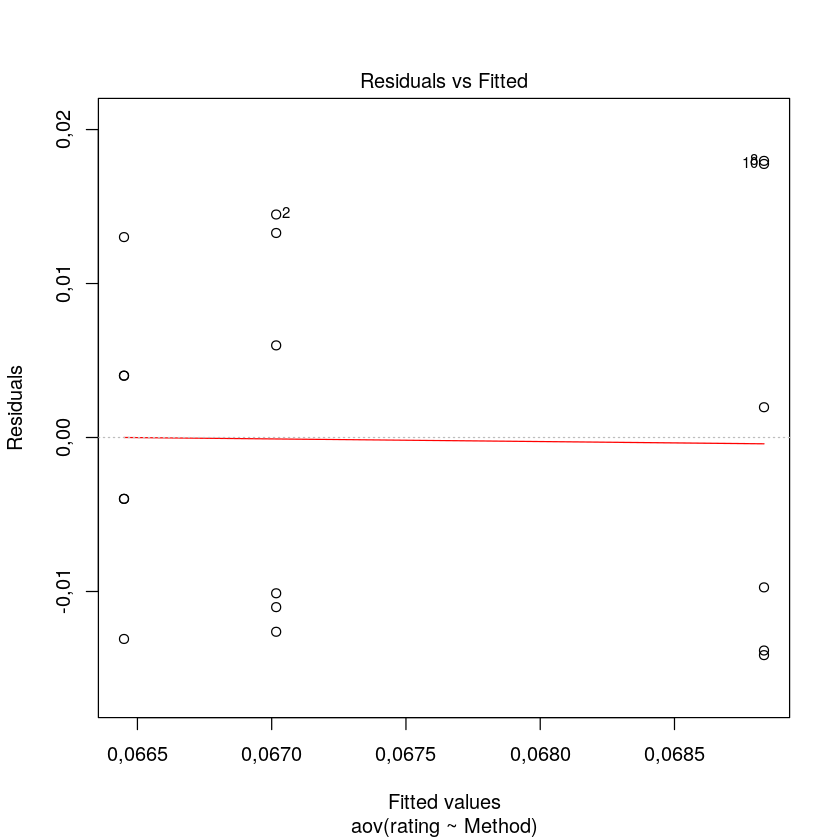


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0,89091, p-value = 0,04


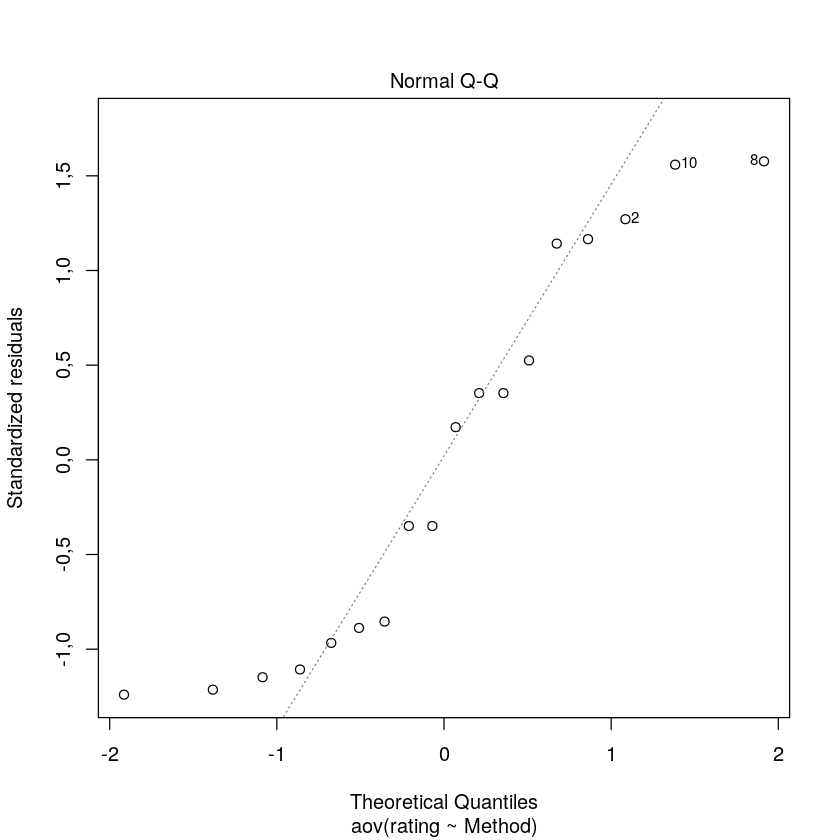

In [20]:
## triple box plot
dat <- data.frame(Method = factor(rep(c("CV 120h", "DMA 120h", "DMA GE 120h"), each=6)), 
                  rating = c(CV_120h, DMA_120h, DMA_GE_120h))

res.aov2 <- aov(rating ~ Method, data = dat)
summary(res.aov2)

## resultado = sem diferença significante de "desempenho"

p <- ggplot(dat, aes(x=Method, y=rating, color=Method)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab(expression(paste("[CH"["3"], 'Hg]')))

p + theme_stata() + scale_color_stata()

# 1. Homogeneity of variances
plot(res.aov2, 1)

# 2. Normality
plot(res.aov2, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov2)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

In [17]:
library(dplyr)

dat

group_by(dat, cond) %>%
  summarise(
    count = n(),
    mean = mean(rating, na.rm = TRUE),
    sd = sd(rating, na.rm = TRUE)
  )


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



cond,rating
CV 120h,"0,07300000"
CV 120h,"0,08150000"
CV 120h,"0,05690000"
CV 120h,"0,08030000"
CV 120h,"0,05440000"
CV 120h,"0,05600000"
DMA 120h,"0,07080000"
DMA 120h,"0,08680000"
DMA 120h,"0,05910000"
DMA 120h,"0,08660000"


cond,count,mean,sd
CV 120h,6,"0,06701667","0,012687855"
DMA 120h,6,"0,06883333","0,015021141"
DMA GE 120h,6,"0,06645000","0,008995647"


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduzidos por coerção”


Call:
lm(formula = dma_t ~ dma_m, data = dat)

Residuals:
       1        2        3        4        5        6        7 
-1481,80   792,22   577,95   -25,98   257,19   546,83  -666,42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12254,11     573,48   21,37 4,16e-06 ***
dma_m        1591,11      22,38   71,09 1,04e-08 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 890,8 on 5 degrees of freedom
Multiple R-squared:  0,999,	Adjusted R-squared:  0,9988 
F-statistic:  5054 on 1 and 5 DF,  p-value: 1,043e-08


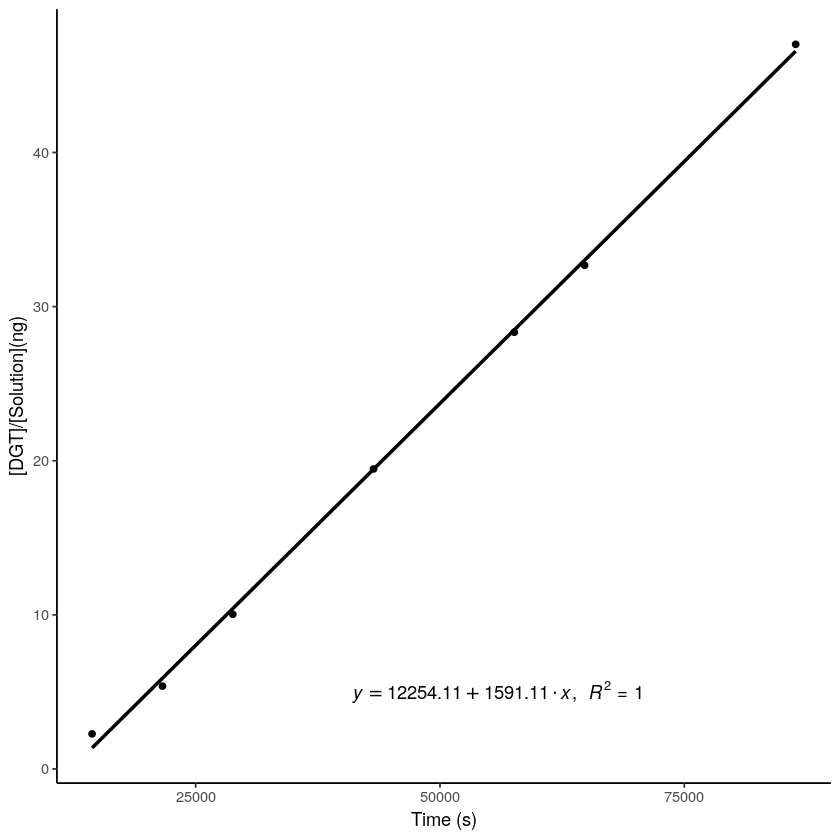

In [70]:
## imersion curve DMA
dma_t = c(14400,21600,28800,43200,57600,64800,86400)
dma_m = c(2.27997212141012,5.37590943975854,10.035721803472,
          19.465564614152,28.33788,32.68098,47.0189202566913)

## triple box plot
dat <- data.frame(dma_t = dma_t, 
                  dma_m = dma_m)
#dat
fit=lm(dma_t~dma_m,data=dat)
summary(fit)

equation = function(x) {
  lm_coef <- list(a = sub(",", ".", as.numeric(round(coef(x)[1], digits = 2))),
                  b = sub(",", ".", as.numeric(round(coef(x)[2], digits = 2))),
                  r2 = round(summary(x)$r.squared, digits = 2));
  lm_eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(R)^2~"="~r2,lm_coef)
  as.character(as.expression(lm_eq));                 
}

# this is predicted line comparing only chosen variables
p = ggplot(data = dat, aes(x = dma_t, y = dma_m)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE, colour="black") +
  xlab("Time (s)") + 
  ylab("[DGT]/[Solution](ng)") +
  #annotate("rect", xmin = 0.00, xmax = 0.1, ymin = -0.056, ymax = -0.044, fill="white", colour="red") +
  annotate("text", x = 56000, y = 5, label = equation(fit), parse = TRUE)

#p + theme_stata() + scale_color_stata() + theme(panel.background = element_blank())
p + theme_classic()
# y = 1591.11*x + 12254.11
# R^2 = 0,999
 


Call:
lm(formula = dma_t ~ dma_m, data = dat)

Residuals:
     1      2      3      4      5 
-10399   6599   6246   5894  -8339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    58628       8536   6,868 0,006320 ** 
dma_m         347010      12619  27,499 0,000106 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 9916 on 3 degrees of freedom
Multiple R-squared:  0,996,	Adjusted R-squared:  0,9947 
F-statistic: 756,2 on 1 and 3 DF,  p-value: 0,0001055


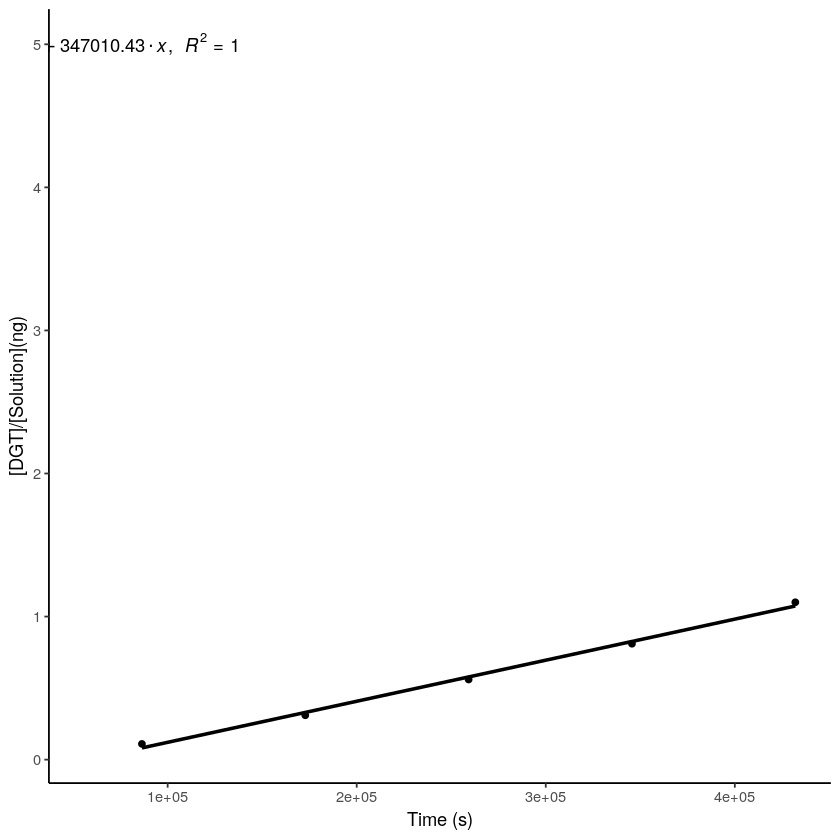

In [71]:
## imersion curve DMA
dma_t = c(86400,172800,259200,345600,432000)
dma_m = c(0.11,0.31,0.56,0.81,1.10)

## triple box plot
dat <- data.frame(dma_t = dma_t, 
                  dma_m = dma_m)
#dat
fit=lm(dma_t~dma_m,data=dat)
summary(fit)

# this is predicted line comparing only chosen variables
p = ggplot(data = dat, aes(x = dma_t, y = dma_m)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE, colour="black") +
  xlab("Time (s)") + 
  ylab("[DGT]/[Solution](ng)") +
  #annotate("text", x = 56000, y = 5, label = equation(fit), parse = TRUE)

# p + theme_stata() + scale_color_stata()
p + theme_classic()
# y = 347010*x + 58628
# R^2 = 0,996
 